In [9]:
"""
Eddington-Malmquist & Lutz-Kelker Biases
----------------------------------------
Figure 5.3

An illustration of the Eddington-Malmquist (left) and Lutz-Kelker (right)
biases for mock data sets that simulate upcoming LSST and Gaia surveys
(see text). The left panel shows a bias in photometric calibration when using
pairs of measurements of the same stars with realistic photometric error
distributions. Depending on the adopted faint limit (x-axis), the median
difference between two measurements (dashed line) is biased when this limit
is too close to the 5-sigma data limit (corresponding to errors of 0.2 mag);
in this example the 5-sigma magnitude limit is set to 24. The solid line shows
the assumed random measurement errors - if the number of stars in the sample
is large, the random error for magnitude difference may become much smaller
than the bias. The right panel shows the bias in absolute magnitude for
samples calibrated using trigonometric parallax measurements with relative
errors :math:`\sigma_\pi / \pi`, and two hypothetical parallax distributions
given by eq. 5.41 and p = 2, 4.
"""

'\nEddington-Malmquist & Lutz-Kelker Biases\n----------------------------------------\nFigure 5.3\n\nAn illustration of the Eddington-Malmquist (left) and Lutz-Kelker (right)\nbiases for mock data sets that simulate upcoming LSST and Gaia surveys\n(see text). The left panel shows a bias in photometric calibration when using\npairs of measurements of the same stars with realistic photometric error\ndistributions. Depending on the adopted faint limit (x-axis), the median\ndifference between two measurements (dashed line) is biased when this limit\nis too close to the 5-sigma data limit (corresponding to errors of 0.2 mag);\nin this example the 5-sigma magnitude limit is set to 24. The solid line shows\nthe assumed random measurement errors - if the number of stars in the sample\nis large, the random error for magnitude difference may become much smaller\nthan the bias. The right panel shows the bias in absolute magnitude for\nsamples calibrated using trigonometric parallax measurements w

In [10]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from astroML.stats import median_sigmaG


In [11]:
#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=16, usetex=True)

In [12]:
def generate_magnitudes(N, k=0.6, m_min=20, m_max=25):
    """
    generate magnitudes from a distribution with
      p(m) ~ 10^(k m)
    """
    klog10 = k * np.log(10)
    Pmin = np.exp(klog10 * m_min)
    Pmax = np.exp(klog10 * m_max)
    return (1. / klog10) * np.log(Pmin + (Pmax - Pmin) * np.random.random(N))


In [13]:
def mag_errors(m_true, m5=24.0, fGamma=0.039):
    """
    compute magnitude errors based on the true magnitude and the
    5-sigma limiting magnitude, m5
    """
    x = 10 ** (0.4 * (mtrue - m5))
    return np.sqrt((0.04 - fGamma) * x + fGamma * x ** 2)

In [14]:
#----------------------------------------------------------------------
# Compute the Eddington-Malmquist bias & scatter
np.random.seed(42)

mtrue = generate_magnitudes(int(1E6), m_min=20, m_max=25)
photomErr = mag_errors(mtrue)

m1 = mtrue + np.random.normal(0, photomErr)
m2 = mtrue + np.random.normal(0, photomErr)
dm = m1 - m2

mGrid = np.linspace(21, 24, 50)
medGrid = np.zeros(mGrid.size)
sigGrid = np.zeros(mGrid.size)

for i in range(mGrid.size):
    medGrid[i], sigGrid[i] = median_sigmaG(dm[m1 < mGrid[i]])


(20.000375079469855, 24.9999987814744)

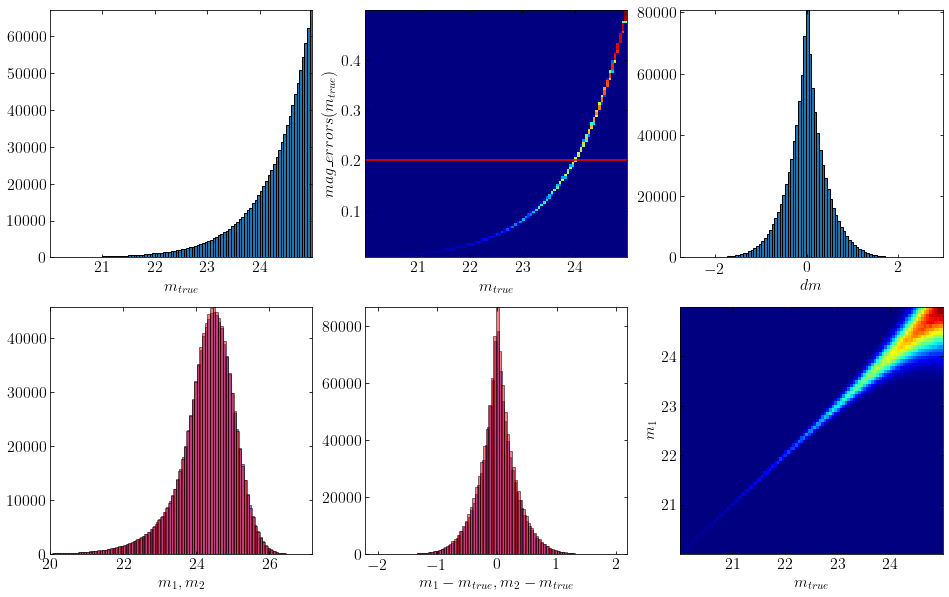

In [15]:
fig=plt.figure(figsize=(16,10))
ax=fig.add_subplot(231)
ax.hist(mtrue,bins=100);
ax.set_xlabel("$m_{true}$")
#ax.set_yscale("log")
ax=fig.add_subplot(232)
ax.hist2d(mtrue,photomErr,bins=(100,100),cmap="jet");
ax.set_xlabel("$m_{true}$")
ax.set_ylabel("$mag\_errors(m_{true})$")
ax.axhline(0.2,color="red")
ax=fig.add_subplot(233)
ax.hist(dm,bins=100)
ax.set_xlabel("$dm$")
ax=fig.add_subplot(234)
ax.hist(m1,bins=100,facecolor="blue",alpha=0.5);
ax.hist(m2,bins=100,facecolor="red",alpha=0.5);
ax.set_xlabel("$m_1,m_2$")
ax=fig.add_subplot(235)
ax.hist(m1-mtrue,bins=100,facecolor="blue",alpha=0.5);
ax.hist(m2-mtrue,bins=100,facecolor="red",alpha=0.5);
ax.set_xlabel("$m_1-m_{true},m_2-m_{true}$")
ax=fig.add_subplot(236)
ax.hist2d(mtrue,m1,bins=(100,100),cmap="jet");
ax.set_xlabel("$m_{true}$")
ax.set_ylabel("$m_1$")
ax.set_ylim(mtrue.min(),mtrue.max())

In [16]:
#----------------------------------------------------------------------
# Lutz-Kelker bias and scatter

mtrue = generate_magnitudes(int(1E6), m_min=17, m_max=20)
relErr = 0.3 * 10 ** (0.4 * (mtrue - 20))

pErrGrid = np.arange(0.02, 0.31, 0.01)

deltaM2 = 5 * np.log(1 + 2 * relErr ** 2)
deltaM4 = 5 * np.log(1 + 4 * relErr ** 2)

med2 = [np.median(deltaM2[relErr < e]) for e in pErrGrid]
med4 = [np.median(deltaM4[relErr < e]) for e in pErrGrid]

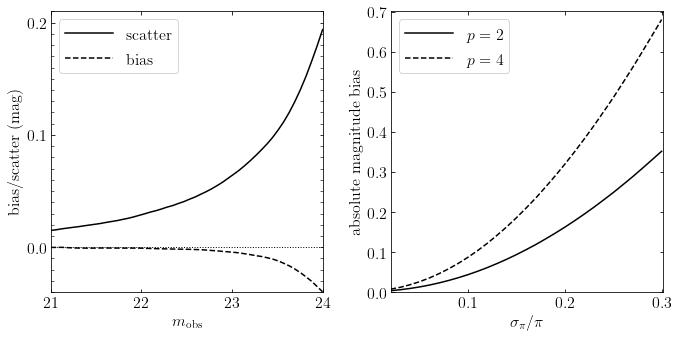

In [17]:
#----------------------------------------------------------------------
# plot results
fig = plt.figure(figsize=(10, 5))
fig.subplots_adjust(left=0.1, right=0.95, wspace=0.25,
                    bottom=0.17, top=0.95)

ax = fig.add_subplot(121)
ax.plot(mGrid, sigGrid, '-k', label='scatter')
ax.plot(mGrid, medGrid, '--k', label='bias')
ax.plot(mGrid, 0 * mGrid, ':k', lw=1)
ax.legend(loc=2)

ax.set_xlabel(r'$m_{\rm obs}$')
ax.set_ylabel('bias/scatter (mag)')

ax.set_ylim(-0.04, 0.21)
ax.xaxis.set_major_locator(plt.MultipleLocator(1.0))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.01))

for l in ax.yaxis.get_minorticklines():
    l.set_markersize(3)

ax = fig.add_subplot(122)
ax.plot(pErrGrid, med2, '-k', label='$p=2$')
ax.plot(pErrGrid, med4, '--k', label='$p=4$')
ax.legend(loc=2)
ax.set_xlabel(r'$\sigma_\pi / \pi$')
ax.set_ylabel('absolute magnitude bias')
ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))
ax.set_xlim(0.02, 0.301)
ax.set_ylim(0, 0.701)

plt.show()
